Centro de Inovação em Inteligência Artificial para a Saúde da UFMG

**Curso de Introdução à Análise de Dados em Saúde com Python**

**Prof. Juliano Gaspar** - Faculdade de Medicina da UFMG

Mais informações: https://ciia-saude.medicina.ufmg.br/

# Estatística Inferencial - Correlações

*   Gráficos de dispersão (variáveis numéricas)
*   Testes de Correlações (variáveis numéricas): Pearson, Spearman e Tau de Kendall

In [1]:
# importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

import scipy.stats as stats
import sklearn.metrics as sklm

# Abrir o arquivo

In [2]:
# Endereço do arquivo com a base de dados
arquivo = 'https://ftp.medicina.ufmg.br/cursosciia/iads/BD_PARTOS.xlsx'

# Ler o arquivo - sem a primeira coluna
dados = pd.read_excel(arquivo)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1708 non-null   int64         
 1   DT_INTERNACAO       1708 non-null   datetime64[ns]
 2   DT_ALTA             1708 non-null   datetime64[ns]
 3   DURACAO_INT         1708 non-null   int64         
 4   GESTACOES           1708 non-null   int64         
 5   PARTOS              1707 non-null   float64       
 6   IG_OBSTETRA         1686 non-null   float64       
 7   IG_PEDIATRA         1704 non-null   float64       
 8   ALTO_RISCO          1708 non-null   object        
 9   TIPO_PARTO          1708 non-null   object        
 10  HIPERTENSAO         1708 non-null   object        
 11  GEMELAR             1708 non-null   object        
 12  CESAREAS_PREVIAS    1701 non-null   float64       
 13  EPISIOTOMIA         1708 non-null   object      

# Gráficos de dispersão
**Para duas variáveis numéricas correlacionadas**

**Exemplo 1: Gráfico de dispersão para observar a correlação entre a idade gestacional informada pelo obstetra e pelo pediatra**

<Axes: xlabel='IG_OBSTETRA', ylabel='IG_PEDIATRA'>

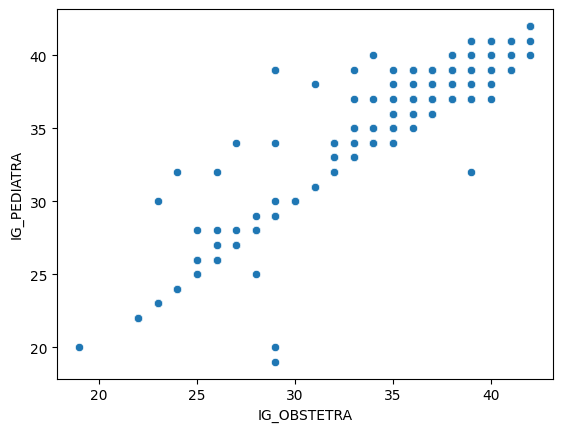

In [3]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="IG_PEDIATRA")

**Exemplo 2: Gráfico de dispersão para observar a correlação entre a idade gestacional informada pelo obstetra e o peso ao nascer**

<Axes: xlabel='IG_OBSTETRA', ylabel='PESO_NASCER'>

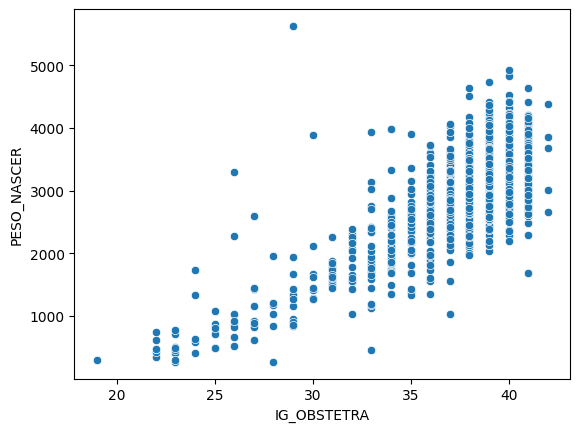

In [4]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER")

**Exemplo 3: Gráfico de dispersão para observar a correlação entre a idade gestacional informada pelo obstetra e o peso ao nascer agrupado por alto risco gestacional**

<Axes: xlabel='IG_OBSTETRA', ylabel='PESO_NASCER'>

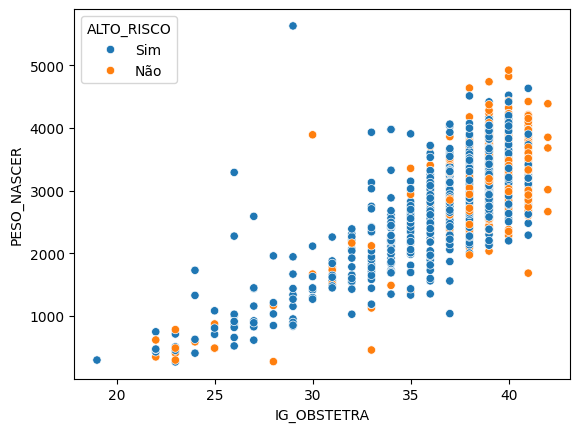

In [5]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER", hue="ALTO_RISCO")

**Exemplo 4: Gráfico de dispersão para observar a correlação entre a idade gestacional informada pelo obstetra e o peso ao nascer agrupado por prematuros, termo-precoce e termo**

<Axes: xlabel='IG_OBSTETRA', ylabel='PESO_NASCER'>

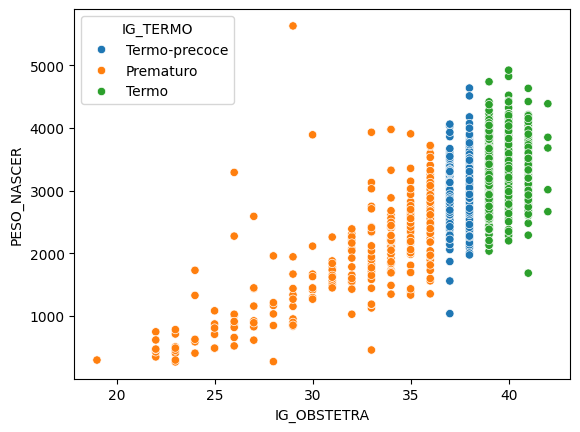

In [6]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER", hue="IG_TERMO")

**Como refazer o exemplo acima e colocar a legenda em ordem (prematuro, termo-precoce e termo) ?**

Dica: Consulte o site da Seaborn e as especificações dessa função (sns.scatterplot)

<Axes: xlabel='IG_OBSTETRA', ylabel='PESO_NASCER'>

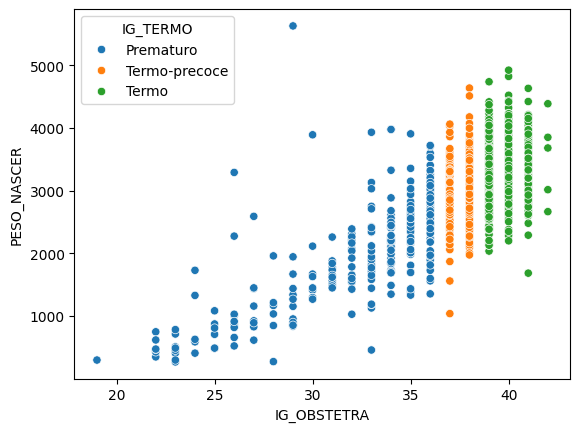

In [7]:
# Gráfico de dispersão para observar a correlação entre
# a idade gestacional informada pelo obstetra e o peso ao nascer
# agrupado por prematuros, termo-precoce e termo

# criar uma variável que contenha a ordem desejada
ordem = ['Prematuro', 'Termo-precoce', 'Termo']

# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER", hue="IG_TERMO", hue_order=ordem)

Saiba mais: https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

# Gráficos de dispersão com linhas de regressão

**Exemplo 1: Gráfico de dispersão com linha de tendência para observar a correlação entre a idade gestacional informada pelo obstetra e pelo pediatra**

<Axes: xlabel='IG_OBSTETRA', ylabel='IG_PEDIATRA'>

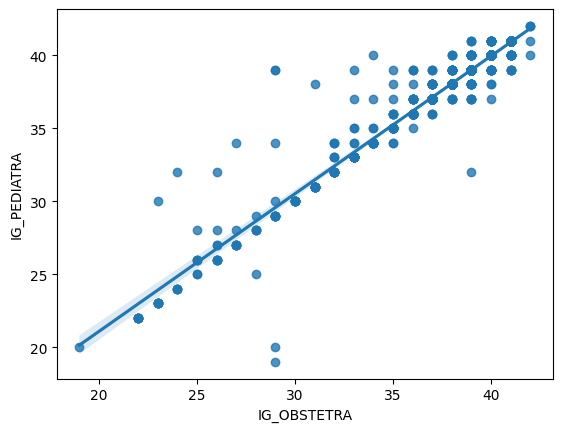

In [8]:
# Gráfico de dispersão com linha de tendência (regressão)
# As faixas com transparências são o intervalo de confiança (por padrão já vem com 95%)

sns.regplot(data=dados, x='IG_OBSTETRA', y='IG_PEDIATRA')

**Exemplo 2: Gráfico de dispersão com linha de tendência para observar a correlação entre a idade gestacional informada pelo obstetra e o peso ao nascer**

<Axes: xlabel='IG_OBSTETRA', ylabel='PESO_NASCER'>

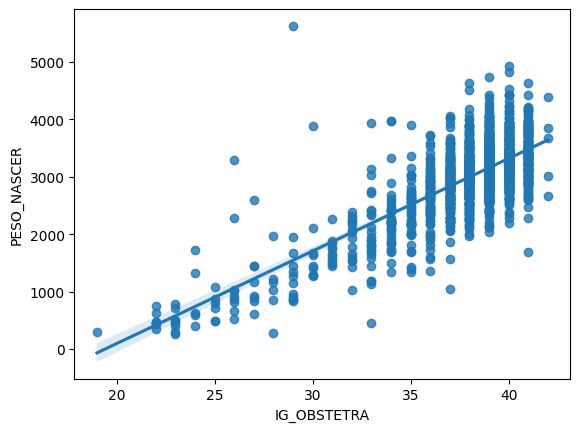

In [9]:
# Gráfico de dispersão com linha de tendência, com IC:95%

sns.regplot(data=dados, x='IG_OBSTETRA', y='PESO_NASCER', ci=95)

**Exemplo 3: Gráfico de dispersão com linha de tendência para observar a correlação entre a idade gestacional informada pelo obstetra e o Escore de Apgar**

<Axes: xlabel='IG_OBSTETRA', ylabel='APGAR5'>

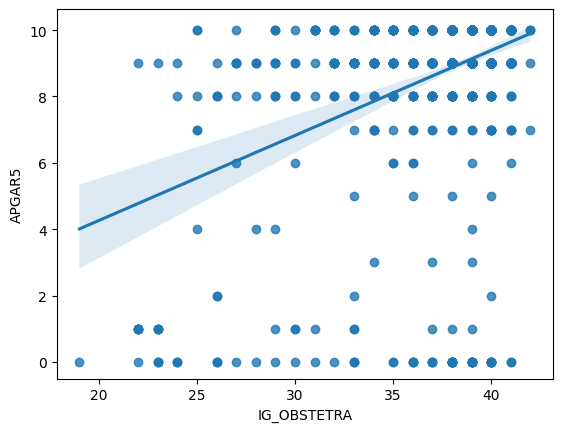

In [10]:
# Gráfico de dispersão com linha de tendência, com IC:99%

sns.regplot(data=dados, x='IG_OBSTETRA', y='APGAR5', ci=99 )

Saiba mais: https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot

# Gráficos de dispersão com linhas de regressão para cada sub-grupo

**Exemplo 1: Gráfico de dispersão com linha de tendência para observar a correlação entre a idade gestacional informada pelo obstetra e o peso ao nascer agrupados por estado ao nascer (vivo ou morto)**

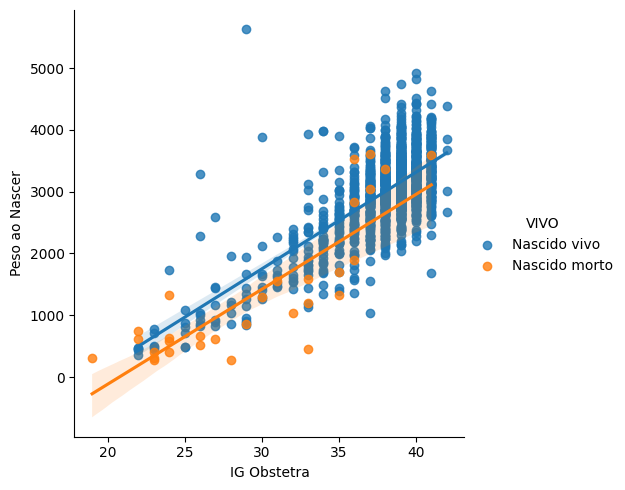

In [11]:
# lmplot cria um gráfico scatter com linha de regressão para cada grupo

g = sns.lmplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER", hue="VIVO")

# definir os labels dos eixos
g.set_axis_labels("IG Obstetra", "Peso ao Nascer")

Interpretação: Observe que no geral, aparenta que os RNs nascidos mortos, idependente da IG, nascem com menos peso.

Mas precisamos fazer o teste estatístico para saber se essa diferença é significativa.

**Exemplo 2: Gráfico de dispersão com linha de tendência para observar a correlação entre a idade gestacional informada pelo obstetra e o peso ao nascer agrupados por gestantes com hipertensão**

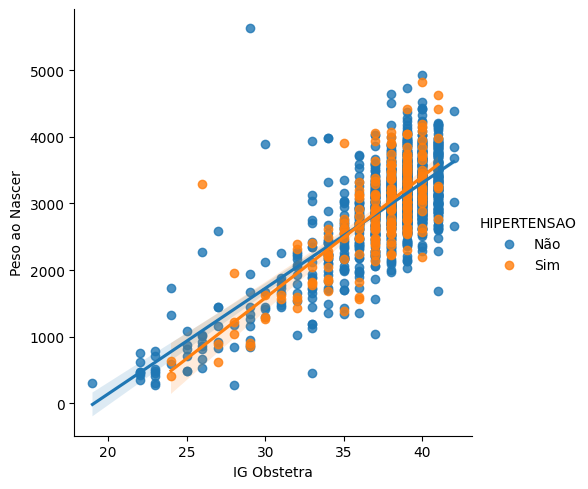

In [12]:
# lmplot cria um gráfico scatter com linha de regressão para cada grupo

g = sns.lmplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER", hue="HIPERTENSAO")

# definir os labels dos eixos
g.set_axis_labels("IG Obstetra", "Peso ao Nascer")

Interpretação: Observe que no geral, aparenta que para o grupo de gestantes hipertensas, os RNs prematuros nascem com menos pesos e quando são a termo nascem mais pesado, em relação ao outro grupo.

Mas precisamos fazer o teste estatístico para saber se essa diferença é significativa.

Saiba mais: https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot

**Testes estatísticos para correlação de variáveis numéricas**

# **Correlação de Pearson**
Pelo menos uma das distribuições é simétrica ou tende para normal

**Exemplo 1: Existe correlação entre a idade gestacional informada pelo obstetra e o peso ao nascer?**

In [13]:
# Selecionar os nomes das variáveis  (IG_OBSTETRA, PESO_NASCER)
varNumericaX = 'IG_OBSTETRA'
varNumericaY = 'PESO_NASCER'

# 1º Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumericaX, varNumericaY])

# 2º Definição das variáveis
X = dados2[varNumericaX].values
Y = dados2[varNumericaY].values

print(X)
print(Y)

[38. 36. 39. ... 26. 27. 39.]
[3590. 2660. 3075. ... 2275. 2590. 3190.]


Teste de Correlação de Pearson
Pearson r: 0.745
p-value: 0.0
Rejeita H0 = Existe correlação!



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

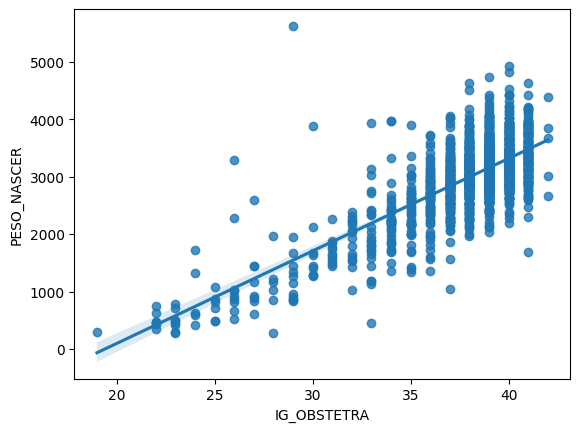

In [14]:
# 1º ETAPA - Correlação de Pearson - Pelo menos uma das distribuição é normal
# H0 não existe correlação entre as variáveis

r, p = stats.pearsonr(X, Y)

print('Teste de Correlação de Pearson')
print('Pearson r:', r.round(3))
print('p-value:', p.round(3))

# interpretação
if p <= 0.05:
    print('Rejeita H0 = Existe correlação!')
else:
    print('Aceita H0 = Não existe correlação!')

print()

# _______________________________________________________________________________________
# 2º ETAPA - Estatística descritiva - Análise Gráfica
sns.regplot(data=dados2, x=varNumericaX, y=varNumericaY)

# para salvar/preparar a figura (depois baixar)
nome_arquivo = 'FiguraAtividade_7.jpg'
plt.savefig(nome_arquivo, format='jpg', dpi=300)
files.download(nome_arquivo)

**Exemplo 2: Existe correlação entre peso no ultrassom e o peso ao nascer?**

In [15]:
# Selecionar os nomes das variáveis (PESO_US, PESO_NASCER)
varNumericaX = 'PESO_US'
varNumericaY = 'PESO_NASCER'

# 1º Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumericaX, varNumericaY])

# 2º Definição das variáveis
X = dados2[varNumericaX].values
Y = dados2[varNumericaY].values

print(X)
print(Y)

[2590.  1660.  2075.  ...  892.5 1113.  2190. ]
[3590. 2660. 3075. ... 2275. 2590. 3190.]


Teste de Correlação de Pearson
Pearson r: 0.973
p-value: 0.0
Rejeita H0 = Existe correlação!



<Axes: xlabel='PESO_US', ylabel='PESO_NASCER'>

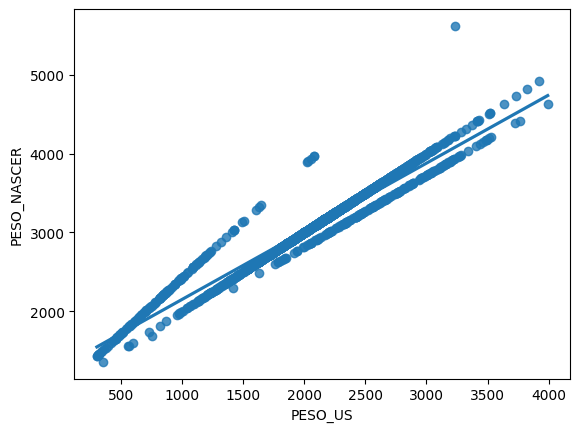

In [16]:
# 1º ETAPA - Correlação de Pearson - Pelo menos uma das distribuição é normal
# H0 não existe correlação entre as variáveis

r, p = stats.pearsonr(X, Y)

print('Teste de Correlação de Pearson')
print('Pearson r:', r.round(3))
print('p-value:', p.round(3))

# interpretação
if p <= 0.05:
    print('Rejeita H0 = Existe correlação!')
else:
    print('Aceita H0 = Não existe correlação!')

print()

# _______________________________________________________________________________________
# 2º ETAPA - Estatística descritiva - Análise Gráfica
sns.regplot(data=dados2, x=varNumericaX, y=varNumericaY)

**Exemplo 3: Existe correlação entre duração da internação e o peso ao nascer?**

In [17]:
# Selecionar os nomes das variáveis (DURACAO_INT, PESO_NASCER)
varNumericaX = 'DURACAO_INT'
varNumericaY = 'PESO_NASCER'

# 1º Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumericaX, varNumericaY])

# 2º Definição das variáveis
X = dados2[varNumericaX].values
Y = dados2[varNumericaY].values

print(X)
print(Y)

[ 1  1  1 ... 48 55 63]
[3590. 2660. 3075. ... 2275. 2590. 3190.]


Teste de Correlação de Pearson
Pearson r: -0.117
p-value: 0.0
Rejeita H0 = Existe correlação!



<Axes: xlabel='DURACAO_INT', ylabel='PESO_NASCER'>

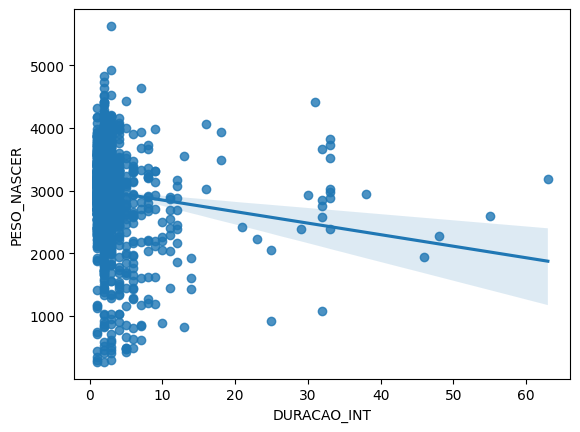

In [18]:
# 1º ETAPA - Correlação de Pearson - Pelo menos uma das distribuição é normal
# H0 não existe correlação entre as variáveis

r, p = stats.pearsonr(X, Y)

print('Teste de Correlação de Pearson')
print('Pearson r:', r.round(3))
print('p-value:', p.round(3))

# interpretação
if p <= 0.05:
    print('Rejeita H0 = Existe correlação!')
else:
    print('Aceita H0 = Não existe correlação!')

print()

# _______________________________________________________________________________________
# 2º ETAPA - Estatística descritiva - Análise Gráfica
sns.regplot(data=dados2, x=varNumericaX, y=varNumericaY)

Saiba mais: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

Saiba mais: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

# **Correlação de Spearman**

Quando nenhuma das distribuições é normal, todas são assimétricas.

**Exemplo 1: Existe correlação entre duração da internação e a idade gestacional informada pelo pediatra?**

In [19]:
# Selecionar os nomes das variáveis (IG_PEDIATRA, DURACAO_INT)
varNumericaX = 'IG_PEDIATRA'
varNumericaY = 'DURACAO_INT'

# 1º Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumericaX, varNumericaY])

# 2º Definição das variáveis
X = dados2[varNumericaX].values
Y = dados2[varNumericaY].values

print(X)
print(Y)

[38. 36. 39. ... 32. 34. 39.]
[ 1  1  1 ... 48 55 63]


Teste de Correlação de Spearman
Spearman r: -0.159
p-value: 0.0
Rejeita H0 = Existe correlação!



<Axes: xlabel='IG_PEDIATRA', ylabel='DURACAO_INT'>

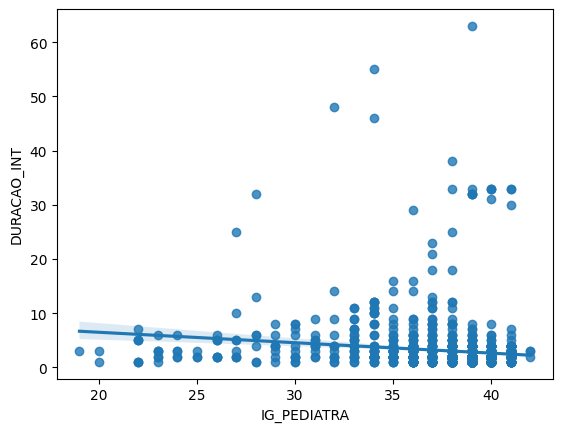

In [20]:
# 1º ETAPA - Correlação de Spearman - Para distribuições assimétricas
# H0 não existe correlação entre as variáveis

r, p = stats.spearmanr(X, Y)

print('Teste de Correlação de Spearman')
print('Spearman r:', r.round(3))
print('p-value:', p.round(3))

# interpretação
if p <= 0.05:
    print('Rejeita H0 = Existe correlação!')
else:
    print('Aceita H0 = Não existe correlação!')

print()

# _______________________________________________________________________________________
# 2º ETAPA - Estatística descritiva - Análise Gráfica
sns.regplot(data=dados2, x=varNumericaX, y=varNumericaY)

**Exemplo 2: Existe correlação entre a idade gestacional informada pelo pediatra e o Escore de Apgar ao 1º minuto?**

In [21]:
# Selecionar os nomes das variáveis (IG_PEDIATRA, APGAR1)
varNumericaX = 'IG_PEDIATRA'
varNumericaY = 'APGAR1'

# 1º Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumericaX, varNumericaY])

# 2º Definição das variáveis
X = dados2[varNumericaX].values
Y = dados2[varNumericaY].values

print(X)
print(Y)

[38. 36. 39. ... 32. 34. 39.]
[9. 9. 9. ... 7. 7. 9.]


Teste de Correlação de Spearman
Spearman r: 0.157
p-value: 0.0
Rejeita H0 = Existe correlação!



<Axes: xlabel='IG_PEDIATRA', ylabel='APGAR1'>

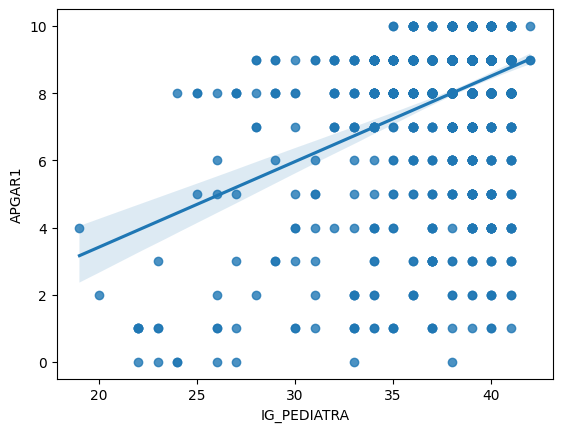

In [22]:
# 1º ETAPA - Correlação de Spearman - Para distribuições assimétricas
# H0 não existe correlação entre as variáveis

r, p = stats.spearmanr(X, Y)

print('Teste de Correlação de Spearman')
print('Spearman r:', r.round(3))
print('p-value:', p.round(3))

# interpretação
if p <= 0.05:
    print('Rejeita H0 = Existe correlação!')
else:
    print('Aceita H0 = Não existe correlação!')

print()

# _______________________________________________________________________________________
# 2º ETAPA - Estatística descritiva - Análise Gráfica
sns.regplot(data=dados2, x=varNumericaX, y=varNumericaY)

**Exemplo 3: Existe correlação entre o Escore de Apgar ao 5º minuto e a duração da internação?**

In [23]:
# Selecionar os nomes das variáveis (APGAR5, DURACAO_INT)
varNumericaX = 'APGAR5'
varNumericaY = 'DURACAO_INT'

# 1º Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumericaX, varNumericaY])

# 2º Definição das variáveis
X = dados2[varNumericaX].values
Y = dados2[varNumericaY].values

print(X)
print(Y)

[10  9 10 ...  9  9 10]
[ 1  1  1 ... 48 55 63]


Teste de Correlação de Spearman
Spearman r: -0.133
p-value: 0.0
Rejeita H0 = Existe correlação!



<Axes: xlabel='APGAR5', ylabel='DURACAO_INT'>

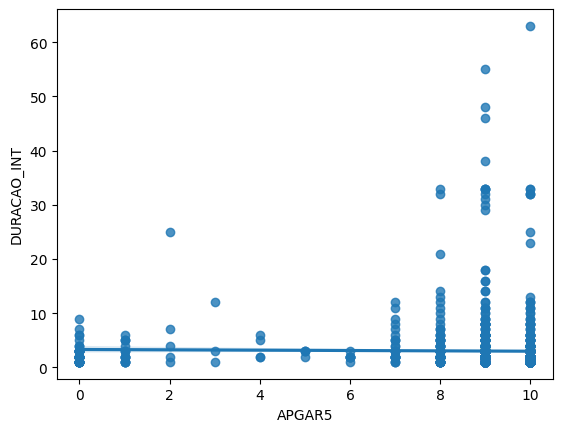

In [24]:
# 1º ETAPA - Correlação de Spearman - Para distribuições assimétricas
# H0 não existe correlação entre as variáveis

r, p = stats.spearmanr(X, Y)

print('Teste de Correlação de Spearman')
print('Spearman r:', r.round(3))
print('p-value:', p.round(3))

# interpretação
if p <= 0.05:
    print('Rejeita H0 = Existe correlação!')
else:
    print('Aceita H0 = Não existe correlação!')

print()

# _______________________________________________________________________________________
# 2º ETAPA - Estatística descritiva - Análise Gráfica
sns.regplot(data=dados2, x=varNumericaX, y=varNumericaY)

# **Correlação de Tau de Kendall**

Para testar correlação de posições (valores ordinais) em duas variáveis (dependentes / relacionadas).

Comparar duas notas, duas avaliações entre outras, feitas por pessoas, técnicas ou equipamentos diferentes.

**Exemplo 1: Existe correlação entre o Escore de Apgar ao 1º minuto e o Escore de Apgar ao 5º minuto?**

In [25]:
# Selecionar os nomes das variáveis (APGAR1, APGAR5)
varNumericaX = 'APGAR1'
varNumericaY = 'APGAR5'

# 1º Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumericaX, varNumericaY])

# 2º Definição das variáveis
X = dados2[varNumericaX].values
Y = dados2[varNumericaY].values

print(X)
print(Y)

[9. 9. 9. ... 7. 7. 9.]
[10  9 10 ...  9  9 10]


Teste de Correlação de Tau de Kendall
Kendall t: 0.617
p-value: 0.0
Rejeita H0 = Existe correlação!



<Axes: xlabel='APGAR1', ylabel='APGAR5'>

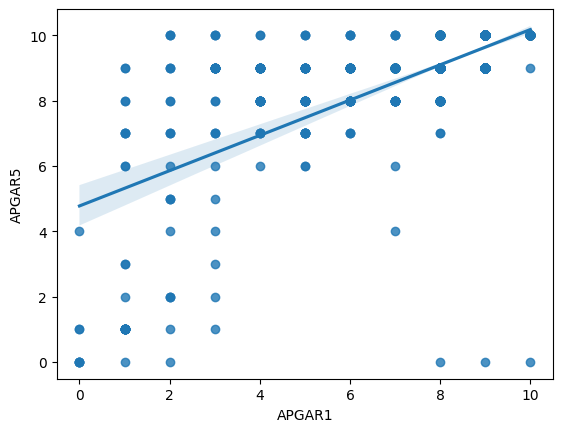

In [26]:
# 1º ETAPA - Correlação de Tau de Kendall - Para distribuições ordinais
# H0 não existe correlação entre as variáveis

r, p = stats.kendalltau(X, Y)

print('Teste de Correlação de Tau de Kendall')
print('Kendall t:', r.round(3))
print('p-value:', p.round(3))

# interpretação
if p <= 0.05:
    print('Rejeita H0 = Existe correlação!')
else:
    print('Aceita H0 = Não existe correlação!')

print()

# _______________________________________________________________________________________
# 2º ETAPA - Estatística descritiva - Análise Gráfica
sns.regplot(data=dados2, x=varNumericaX, y=varNumericaY)

**Exemplo 1: Existe correlação entre a idade gestacional informada pelo obstetra e pelo pediatra?**

In [27]:
# Selecionar os nomes das variáveis (IG_OBSTETRA, IG_PEDIATRA)
varNumericaX = 'IG_OBSTETRA'
varNumericaY = 'IG_PEDIATRA'

# 1º Filtrar registros que sem nulos nas duas colunas
dados2 = dados.dropna(how = 'any', subset=[varNumericaX, varNumericaY])

# 2º Definição das variáveis
X = dados2[varNumericaX].values
Y = dados2[varNumericaY].values

print(X)
print(Y)

[38. 36. 39. ... 26. 27. 39.]
[38. 36. 39. ... 32. 34. 39.]


Teste de Correlação de Tau de Kendall
Kendall t: 0.938
p-value: 0.0
Rejeita H0 = Existe correlação!



<Axes: xlabel='IG_OBSTETRA', ylabel='IG_PEDIATRA'>

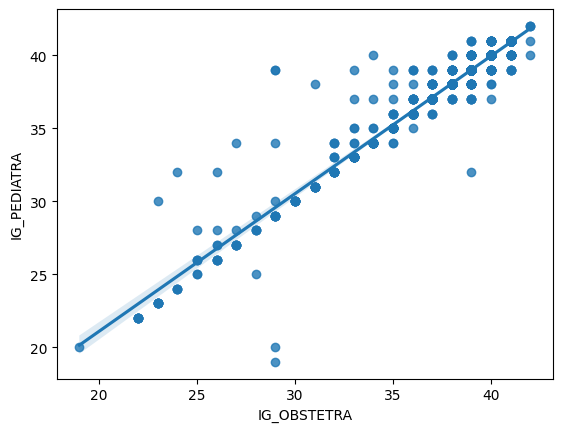

In [28]:
# 1º ETAPA - Correlação de Tau de Kendall - Para distribuições ordinais
# H0 não existe correlação entre as variáveis

r, p = stats.kendalltau(X, Y)

print('Teste de Correlação de Tau de Kendall')
print('Kendall t:', r.round(3))
print('p-value:', p.round(3))

# interpretação
if p <= 0.05:
    print('Rejeita H0 = Existe correlação!')
else:
    print('Aceita H0 = Não existe correlação!')

print()

# _______________________________________________________________________________________
# 2º ETAPA - Estatística descritiva - Análise Gráfica
sns.regplot(data=dados2, x=varNumericaX, y=varNumericaY)